In [36]:
df = pd.read_csv("df_ff_factors_100325.csv")
df = df.drop(columns=["Unnamed: 0","crsp_portno"])
df = df.sort_values(by='date')
df

df_tech = pd.read_csv("df_ff_factors_techfunds.csv")
df_tech = df_tech.drop(columns=["Unnamed: 0","crsp_portno"])
df_tech = df_tech.sort_values(by='date')

In [ ]:
df

,crsp_fundno,date,mth_return,exp_ratio,turn_ratio,normalised_flow,mtna,gdp_to_debt_ratio,gdp_growth_rate,unm_rate,...,smb,hml,rmw,cma,rf,umd,mkt_return,excess_return,rolling_alpha_5f,shortrun_momentum
52070,21716.0,1993-05-28,-0.005886,0.0065,1.01,0.049932,124.190,63.915,3.5225,7.1,...,0.0190,-0.0342,-0.0012,-0.0104,0.0022,0.0022,-0.037196,-0.008086,-0.008086,0.031310
52071,21716.0,1993-06-30,0.023484,0.0065,1.01,0.036697,131.211,63.915,3.5225,7.0,...,0.0013,0.0275,-0.0092,0.0121,0.0025,0.0455,-0.037196,0.020984,0.020984,0.045995
13848,8441.0,1993-07-30,0.012705,0.0097,1.21,0.000000,511.692,64.101,3.5225,6.9,...,0.0095,0.0285,-0.0187,0.0206,0.0024,0.0316,-0.077037,0.010305,0.010305,0.089742
52072,21716.0,1993-07-30,0.012120,0.0065,1.01,0.048386,138.698,64.101,3.5225,6.9,...,0.0095,0.0285,-0.0187,0.0206,0.0024,0.0316,-0.077037,0.009720,0.009720,0.060382
97720,31925.0,1993-07-30,0.006554,0.0064,1.15,0.003378,635.317,64.101,3.5225,6.9,...,0.0095,0.0285,-0.0187,0.0206,0.0024,0.0316,-0.077037,0.004154,0.004154,0.083592
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102347,36888.0,2024-10-31,-0.011755,0.0205,0.38,-0.369789,1.400,120.731,2.5427,4.1,...,-0.0568,-0.0247,0.0066,-0.0102,0.0047,0.0508,0.018446,-0.016455,-0.009595,-0.016542
176070,86513.0,2024-10-31,0.000691,0.0104,0.31,0.046618,549.600,120.731,2.5427,4.1,...,-0.0568,-0.0247,0.0066,-0.0102,0.0047,0.0508,0.018446,-0.004009,-0.001237,-0.011957
182998,95721.0,2024-10-31,-0.020548,0.0078,0.88,-0.080079,0.100,120.731,2.5427,4.1,...,-0.0568,-0.0247,0.0066,-0.0102,0.0047,0.0508,0.018446,-0.025248,0.027648,-0.015228
182760,95714.0,2024-10-31,-0.020782,0.0103,0.88,-0.001780,4.500,120.731,2.5427,4.1,...,-0.0568,-0.0247,0.0066,-0.0102,0.0047,0.0508,0.018446,-0.025482,0.027850,-0.015541


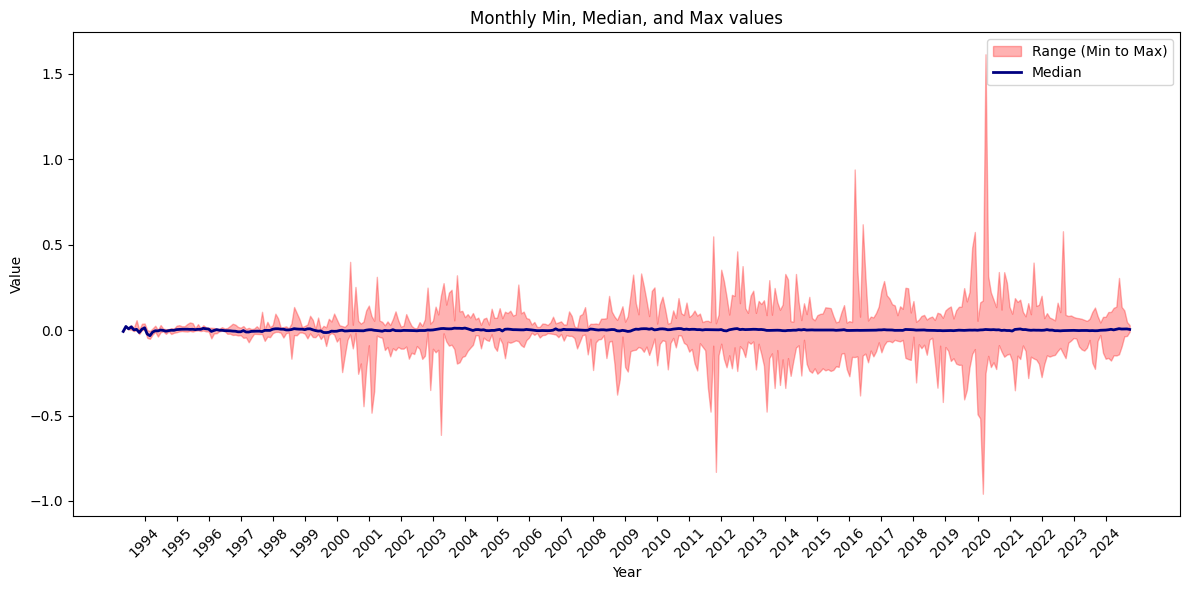

In [93]:
df['date'] = pd.to_datetime(df['date'])

# Extract the year and month from the 'date' column
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month

# Group by 'year' and 'month' and apply aggregation
agg_df = df.groupby(['year', 'month']).agg(
    min_value=('rolling_alpha_5f', 'min'),
    median_value=('rolling_alpha_5f', 'median'),
    max_value=('rolling_alpha_5f', 'max')
).reset_index()

agg_df['year_month'] = agg_df['year'].astype(str) + '-' + agg_df['month'].astype(str).str.zfill(2)

# Plotting the results
plt.figure(figsize=(12, 6))
plt.fill_between(agg_df['year_month'], agg_df['min_value'], agg_df['max_value'], color='red', alpha=0.3, label='Range (Min to Max)')
plt.plot(agg_df['year_month'], agg_df['median_value'], label='Median', color='navy', linewidth=2)


# Set labels and title
plt.xlabel('Year')
plt.ylabel('Value')
plt.title('Monthly Min, Median, and Max values')

# Create custom ticks for x-axis to show only the year
ticks = []
labels = []
for i, row in agg_df.iterrows():
    if row['month'] == 1:  # Only show ticks for January (or the first month of each year)
        ticks.append(i)
        labels.append(str(row['year']))

plt.xticks(ticks=ticks, labels=labels, rotation=45)

plt.legend()
plt.tight_layout()
plt.show()

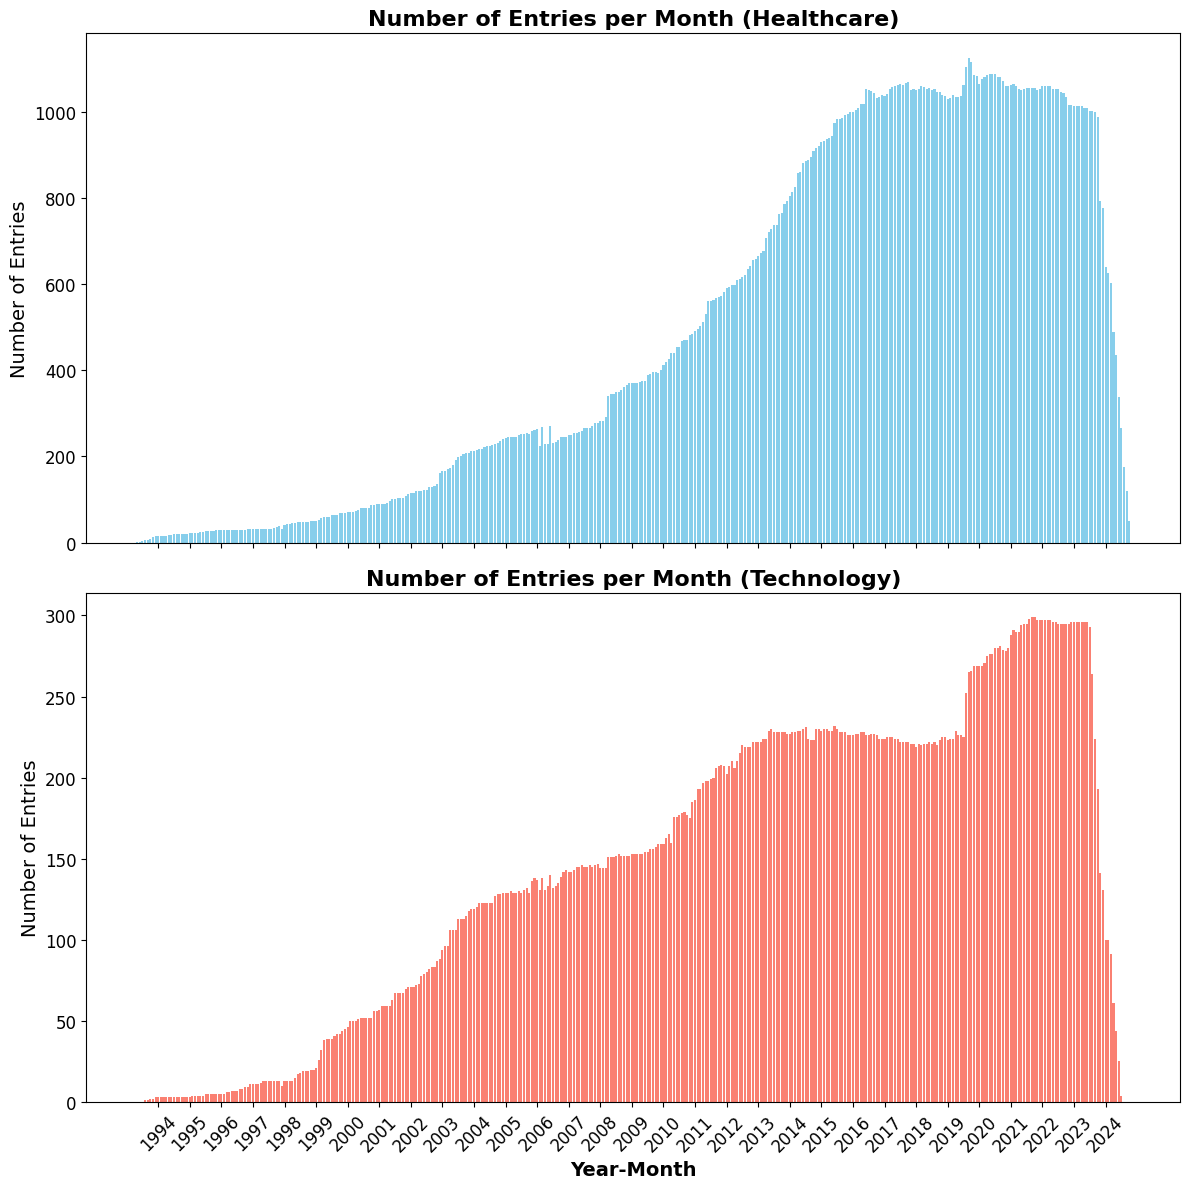

In [114]:
# ---- Process Healthcare Data ----
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
month_counts_healthcare = df.groupby(['year', 'month']).size().reset_index(name='count')
month_counts_healthcare['year_month'] = month_counts_healthcare['year'].astype(str) + '-' + month_counts_healthcare['month'].astype(str).str.zfill(2)

# ---- Process Tech Data ----
df_tech['date'] = pd.to_datetime(df_tech['date'])
df_tech['year'] = df_tech['date'].dt.year
df_tech['month'] = df_tech['date'].dt.month
month_counts_tech = df_tech.groupby(['year', 'month']).size().reset_index(name='count')
month_counts_tech['year_month'] = month_counts_tech['year'].astype(str) + '-' + month_counts_tech['month'].astype(str).str.zfill(2)

# ---- Create 2×1 Subplot ----
fig, axes = plt.subplots(2, 1, figsize=(12, 12), sharex=True)

# ---- Plot Healthcare ----
ax = axes[0]
ax.bar(month_counts_healthcare['year_month'], month_counts_healthcare['count'], color='skyblue')
ax.set_title('Number of Entries per Month (Healthcare)', fontsize=16, fontweight='bold')
ax.set_ylabel('Number of Entries', fontsize=14)
ax.tick_params(axis='both', labelsize=12)

# ---- Plot Tech ----
ax = axes[1]
ax.bar(month_counts_tech['year_month'], month_counts_tech['count'], color='salmon')
ax.set_title('Number of Entries per Month (Technology)', fontsize=16, fontweight='bold')
ax.set_ylabel('Number of Entries', fontsize=14)
ax.tick_params(axis='both', labelsize=12)

# ---- Set X-axis ticks (Only show years at January) ----
ticks = []
labels = []
for i, row in month_counts_healthcare.iterrows():
    if row['month'] == 1:  # Only show January labels
        ticks.append(i)
        labels.append(str(row['year']))

plt.xticks(ticks=ticks, labels=labels, rotation=45, fontsize=12)

# ---- Adjust Layout and Show ----
plt.xlabel('Year-Month', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

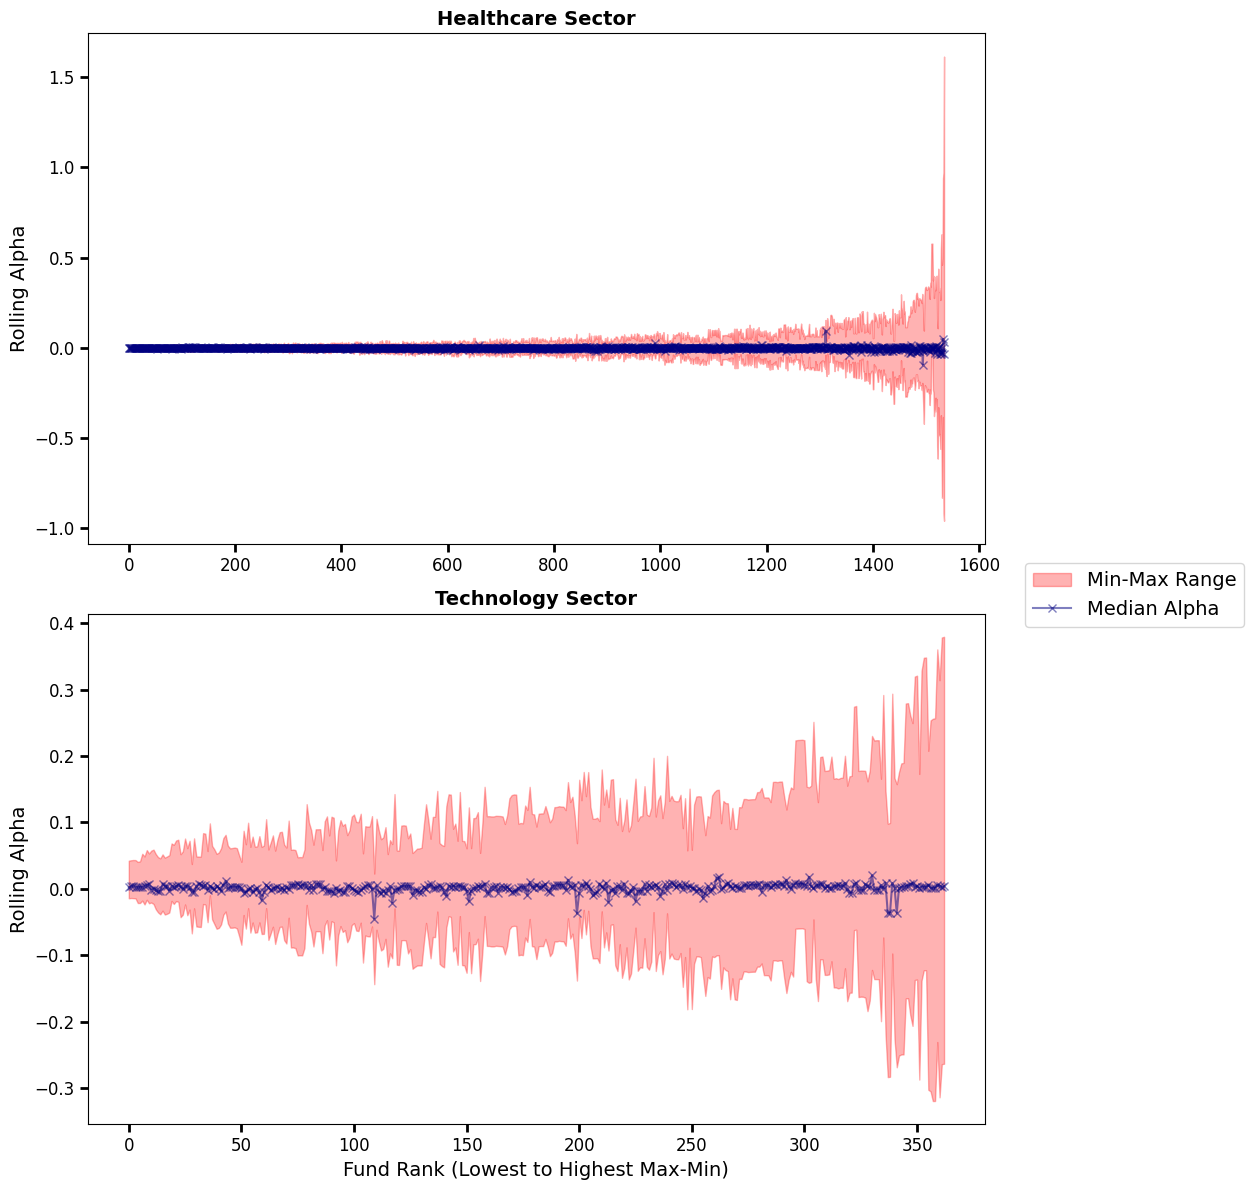

In [115]:
import matplotlib.pyplot as plt
import pandas as pd

fig, axes = plt.subplots(2, 1, figsize=(12, 12))

# ---- Healthcare Sector ----
fund_stats_healthcare = df.groupby('crsp_fundno')['rolling_alpha_5f'].agg(['min', 'median', 'max'])
fund_stats_healthcare['range'] = fund_stats_healthcare['max'] - fund_stats_healthcare['min']
sorted_funds_healthcare = fund_stats_healthcare.sort_values('range').index
fund_rank_mapping_healthcare = {fund: rank for rank, fund in enumerate(sorted_funds_healthcare)}
df['fund_rank'] = df['crsp_fundno'].map(fund_rank_mapping_healthcare)

ax = axes[0]
ax.fill_between(range(len(sorted_funds_healthcare)), fund_stats_healthcare.loc[sorted_funds_healthcare, 'min'], 
                fund_stats_healthcare.loc[sorted_funds_healthcare, 'max'], color='red', alpha=0.3, label='Min-Max Range')
ax.plot(range(len(sorted_funds_healthcare)), fund_stats_healthcare.loc[sorted_funds_healthcare, 'median'], 
        color='navy', marker='x', linestyle='-', label='Median Alpha', alpha=0.5)

ax.set_title('Healthcare Sector',fontweight = 'bold', fontsize =14)
ax.set_ylabel('Rolling Alpha', fontsize =14)
ax.tick_params(axis='both', labelsize=12, width=2, length=6)

# ---- Tech Sector ----
fund_stats_tech = df_tech.groupby('crsp_fundno')['rolling_alpha_5f'].agg(['min', 'median', 'max'])
fund_stats_tech['range'] = fund_stats_tech['max'] - fund_stats_tech['min']
sorted_funds_tech = fund_stats_tech.sort_values('range').index
fund_rank_mapping_tech = {fund: rank for rank, fund in enumerate(sorted_funds_tech)}
df_tech['fund_rank'] = df_tech['crsp_fundno'].map(fund_rank_mapping_tech)

ax = axes[1]
ax.fill_between(range(len(sorted_funds_tech)), fund_stats_tech.loc[sorted_funds_tech, 'min'], 
                fund_stats_tech.loc[sorted_funds_tech, 'max'], color='red', alpha=0.3, label='Min-Max Range')
ax.plot(range(len(sorted_funds_tech)), fund_stats_tech.loc[sorted_funds_tech, 'median'], 
        color='navy', marker='x', linestyle='-', label='Median Alpha', alpha=0.5)

ax.set_title('Technology Sector',fontweight = 'bold', fontsize =14)
ax.set_xlabel('Fund Rank (Lowest to Highest Max-Min)', fontsize =14)
ax.set_ylabel('Rolling Alpha', fontsize =14)
ax.tick_params(axis='both', labelsize=12, width=2, length=6)

# ---- Common Legend ----
handles, labels = axes[0].get_legend_handles_labels()  # Get legend from first subplot
fig.legend(handles, labels, loc='center left', bbox_to_anchor=(0.85, 0.5), fontsize=14, frameon=True)  # Place on right side

plt.tight_layout(rect=[0, 0, 0.85, 1])  # Adjust layout to make space for legend
plt.show()

#### **Data Processing**

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Loading in df
df = pd.read_csv("df_ff_factors_100325.csv")
df = df.drop(columns=["Unnamed: 0","crsp_portno"])
df = df.sort_values(by='date')
df['date'] = pd.to_datetime(df['date'])

# Alpha model training results (all models)
tuned_results = pd.read_csv("tuned_results_xgboostlgbm_yearly_tuned_every_round.csv").drop(columns=["Unnamed: 0"])

tuned_results_tech = pd.read_csv("tech_funds_forecast.csv").drop(columns=["Unnamed: 0"])

tuned_results.head()
tuned_results_healthcare = pd.read_csv("tuned_results.csv").drop(columns=["Unnamed: 0"])

Adding Dates To The Results Dataframe

In [87]:
# df_new = df[["crsp_fundno", "date", 'rolling_alpha_5f']]
df_new = df.copy().iloc[int(len(df) * 0.7):]

In [ ]:
# Combining results df with dates

rolling_alphas = ["rolling_alpha_5f"]
results = [tuned_results_healthcare]
all_results_healthcare = {}

for i in range(0, len(rolling_alphas)):

    dataset = df_new[["crsp_fundno", "date", 'rolling_alpha_5f']]
    merged_df = pd.merge(results[i], dataset, how="left", on=rolling_alphas[i])
    # merged_df = merged_df.rename(columns={'naive': f'naive_{factor}'})
    
    merged_df_no_id = merged_df.drop(columns=['crsp_fundno'])
    merged_df_no_id = merged_df_no_id.set_index('date')
    feature_cols = [col for col in merged_df_no_id.columns if col not in [rolling_alphas[i]]]

    # Using a dictionary to store the df for different factor models
    all_results_healthcare[rolling_alphas[i]] = merged_df_no_id
all_results_healthcare = all_results_healthcare['rolling_alpha_5f']

In [89]:
all_results_healthcare_clean = all_results_healthcare[all_results_healthcare.index.notna()]
# all_results_healthcare_clean.sort_index()

In [90]:
rolling_alphas = ["rolling_alpha_5f"]
results = [tuned_results_tech]
all_results_tech = {}
df = pd.read_csv("df_ff_factors_techfunds.csv")
df = df.drop(columns=["Unnamed: 0","crsp_portno"])
df = df.sort_values(by='date')
df['date'] = pd.to_datetime(df['date']) 

for i in range(0, len(rolling_alphas)):
    factor = rolling_alphas[i][-2:]

    dataset = df[["crsp_fundno", "date", rolling_alphas[i]]]
    merged_df = pd.merge(results[i], dataset, how="left", on=rolling_alphas[i])
    # merged_df = merged_df.rename(columns={'naive': f'naive_{factor}'})
    
    merged_df_no_id = merged_df.drop(columns=['crsp_fundno'])
    merged_df_no_id = merged_df_no_id.set_index('date')
    feature_cols = [col for col in merged_df_no_id.columns if col not in [rolling_alphas[i]]]

    # Using a dictionary to store the df for different factor models
    all_results_tech[rolling_alphas[i]] = merged_df_no_id
all_results_tech = all_results_tech['rolling_alpha_5f']

Functions for Calculating Metrics & Plotting

In [92]:
# Generation of Error Metrics
def mean_absolute_scaled_error(y_true, y_pred):
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    
    naive_mae = np.mean(np.abs(y_true[1:] - y_true[:-1]))
    mae = mean_absolute_error(y_true, y_pred)
    mase = mae / naive_mae if naive_mae != 0 else np.nan

    return mase 

def metrics_generator(df, metric, outcome_var, relevant_cols):
    if metric == 'MASE':
        final_df = df.groupby(df.index).apply(
            lambda group: pd.Series({
                col: mean_absolute_scaled_error(group[outcome_var], group[col]) for col in relevant_cols
            })
        )
    elif metric == 'MAE':
        final_df = df.groupby(df.index).apply(
            lambda group: pd.Series({
                col: mean_absolute_error(group[outcome_var], group[col]) for col in relevant_cols
            })
        )
    elif metric == 'R2':
        final_df = df.groupby(df.index).apply(
            lambda group: pd.Series({
                col: max(r2_score(group[outcome_var], group[col]), -2) for col in relevant_cols
            })
        )
    elif metric == 'MSE':
        final_df = df.groupby(df.index).apply(
            lambda group: pd.Series({
                col: mean_squared_error(group[outcome_var], group[col]) for col in relevant_cols
            })
        )
    else:
        final_df = df.groupby(df.index).apply(
            lambda group: pd.Series({
                col: np.sqrt(mean_squared_error(group[outcome_var], group[col])) for col in relevant_cols
            })
        )
    return final_df


all_metrics_results = {metric: {} for metric in ["MASE", "MAE", "R2", "MSE", "RMSE"]}

models = ['ridge', 'rf', 'xgboost', 'pca', 'lgbm']
# models = ['ridge', 'rf', 'pca', 'lstm']
    
rmse_healthcare = metrics_generator(all_results_healthcare_clean, metric = "RMSE", outcome_var="rolling_alpha_5f", relevant_cols = models)
# rmse_tech = metrics_generator(all_results_healthcare_clean, metric = "RMSE", outcome_var="rolling_alpha_5f", relevant_cols = models)
# r2 = metrics_generator(all_results, metric = "R2", outcome_var="rolling_alpha_5f", relevant_cols = models)
# mse = metrics_generator(all_results, metric = "MSE", outcome_var="rolling_alpha_5f", relevant_cols = models)
# mae = metrics_generator(all_results, metric = "MAE", outcome_var="rolling_alpha_5f", relevant_cols = models)

In [69]:
rmse_healthcare

,ridge,rf,xgboost,pca,lgbm
date,,,,,
2020-01-31,0.027776,0.023570,0.023199,0.028005,0.022881
2020-02-28,0.023960,0.026003,0.026385,0.024212,0.026364
2020-03-31,0.050654,0.054055,0.053353,0.051075,0.053497
2020-04-30,0.085561,0.082134,0.083466,0.083780,0.080664
2020-05-29,0.023149,0.024181,0.029400,0.022714,0.023206
2020-06-30,0.017434,0.017581,0.021716,0.017053,0.020410
2020-07-31,0.018696,0.017224,0.018030,0.018570,0.017513
2020-08-31,0.019718,0.017674,0.019686,0.019772,0.019698
2020-09-30,0.030883,0.031267,0.032264,0.031375,0.032120


#### **Plots**

Plot 1: Metrics Plot by Time

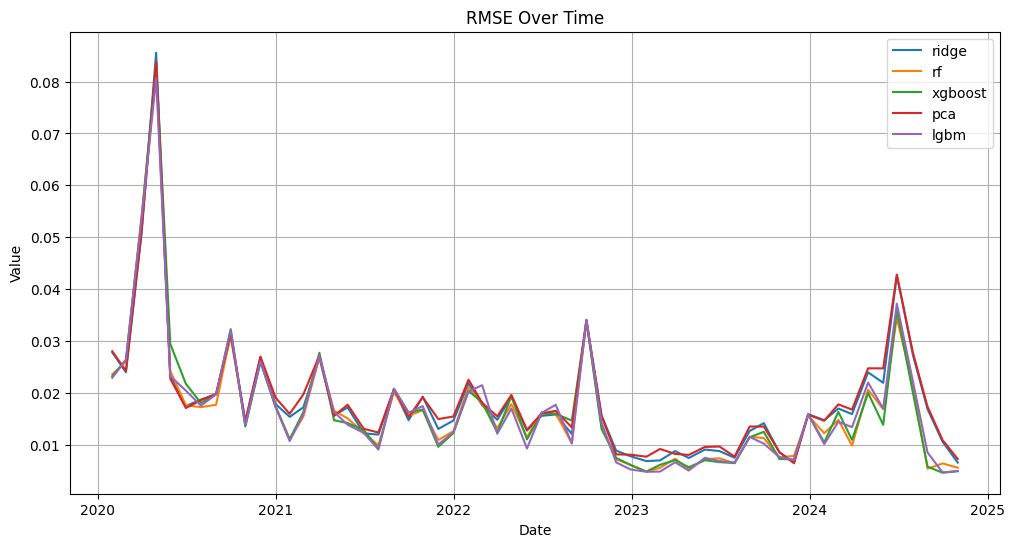

In [93]:
# Single Plot
import pandas as pd
import matplotlib.pyplot as plt

# Load your data (assuming it's already in a DataFrame named df)
rmse_healthcare.index = pd.to_datetime(rmse_healthcare.index)  # Ensure index is datetime

# Plot all models
plt.figure(figsize=(12, 6))
for column in rmse_healthcare.columns:
    plt.plot(rmse_healthcare.index, rmse_healthcare[column], label=column)

# Formatting
plt.xlabel("Date")
plt.ylabel("Value")
plt.title("RMSE Over Time")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
list_of_dates_unique = df_combined_new.index.unique()
mean_lst = []
actual_val = df_combined_new[['rolling_alpha_5f']]
# Loop through the list of unique dates
for i in range(len(list_of_dates_unique)):
    if i < 3:  # For the first 3 entries, we cannot have a rolling mean for 3 previous dates
        mean_val = 0  # Set to 0 for first 3 dates (no rolling mean)
        mean_lst.append(mean_val)
        continue

    # Filter values for the previous 3 dates (excluding the current date)
    filtered_val = actual_val[actual_val.index.isin(list_of_dates_unique[i-3:i])]
    mean_val = filtered_val['rolling_alpha_5f'].mean()  # Compute the mean of the previous 3 dates
    mean_lst.append(mean_val)

mean_df = pd.DataFrame(
    {'date': list_of_dates_unique,
     'benchmark_alpha': mean_lst}
)

# Reset index for merging
df_combined_new_reset = df_combined_new.reset_index()
# Merge the original DataFrame with the computed rolling means and setting date as index
combined_benchmark = pd.merge(df_combined_new_reset, mean_df, on='date', how='left')
combined_benchmark = combined_benchmark.set_index('date')

combined_benchmark
# combined_benchmark.to_csv('healthcare_results_withbenchmark.csv')

Expanding Window Mean Benchmark

In [ ]:
# df_combined_new = df_combined_new.sort_index()
# list_of_dates_unique = df_combined_new.index.unique()
# mean_lst = []
# actual_val = df_combined_new[['rolling_alpha_5f']]
# for i in range(len(list_of_dates_unique)):
#     if i == 0: # First entry
#         mean_val = 0
#         mean_lst.append(mean_val)
#         continue
#     filtered_val = actual_val[actual_val.index < list_of_dates_unique[i]]
#     mean_val = filtered_val['rolling_alpha_5f'].mean()
#     mean_lst.append(mean_val)
# mean_df = pd.DataFrame(
#     {'date' : list_of_dates_unique,
#     'benchmark_alpha' : mean_lst}
# )
# df_combined_new_reset = df_combined_new.reset_index()
# # df_combined_new.index.map(mean_df)
# # df_combined_new
# combined_benchmark = pd.merge(df_combined_new_reset,mean_df,on='date',how='left')
# combined_benchmark = combined_benchmark.set_index('date')
# mean_df

Rolling Window Mean Benchmark

,rolling_alpha_5f,lasso,ridge,xgboost,lgbm,rf,pca,lstm,benchmark_alpha
date,,,,,,,,,
2020-01-31,-0.016216,-0.006023,-0.004631,-0.009786,-0.010216,-0.008661,-0.004397,0.000599,0.000000
2020-01-31,0.014582,-0.002892,-0.003255,-0.002599,-0.002433,-0.001765,-0.002185,-0.005375,0.000000
2020-01-31,-0.001668,-0.002073,-0.002393,-0.000213,0.000026,0.000297,-0.001685,-0.005855,0.000000
2020-01-31,-0.007246,-0.003809,-0.004445,-0.004223,-0.003876,-0.001454,-0.002525,-0.002660,0.000000
2020-01-31,-0.014748,-0.006717,-0.007886,-0.009923,-0.009706,-0.007551,-0.004753,-0.003942,0.000000
...,...,...,...,...,...,...,...,...,...
2024-10-31,0.003437,0.002063,0.002063,0.005719,0.007249,0.006728,0.001926,-0.001503,0.013817
2024-10-31,-0.008173,-0.002538,-0.002319,-0.006389,-0.004258,-0.004829,-0.002229,-0.001217,0.013817
2024-10-31,-0.005215,-0.001479,-0.001389,-0.003014,-0.001073,-0.001363,-0.001058,-0.003091,0.013817


Naive Benchmark

In [214]:
# previous_day_mean = df_combined_new.groupby('date')['rolling_alpha_5f'].mean().shift(1)

# # Map the previous day's mean back to the original DataFrame
# df_combined_new['benchmark_alpha'] = df_combined_new.index.map(previous_day_mean).fillna(0)
# df_combined_new

Plot 3: Cumulative Alpha Over Time

In [225]:
def plot_cumulative_alpha(df, outcome_var):
    label_mapping = {'ridge': 'Ridge', 'xgboost': 'XGBoost', 'rf': 'RF', 'pca': 'PCA', 'lasso': 'Lasso', 'lgbm':'LGBM', 'lstm':'LSTM','benchmark_alpha':'Benchmark'}
    color_list = {'Ridge': 'purple', 'XGBoost': 'gold', 'PCA': 'lightseagreen', 'RF': 'navy', 'Lasso':'crimson', 'LGBM':'pink', 'LSTM':'green', 'Benchmark':'black'}
    
    fig, axis = plt.subplots(figsize=(12, 6))
    legend_handles = {}
    df_to_plot = df.copy()
    df_to_plot.index = pd.to_datetime(df_to_plot.index)
    df_to_plot = df_to_plot.sort_index()
    df_to_plot = df_to_plot.groupby(df_to_plot.index).mean()   # take mean for duplicated dates
    model_cols = [col for col in df_to_plot.columns if col != outcome_var]
    df_to_plot[outcome_var] = (df_to_plot[outcome_var] - df_to_plot[outcome_var].mean()) / df_to_plot[outcome_var].std()

    # Cumulative actual alpha
    df_to_plot['cumulative_action_based_benchmark'] = df_to_plot['benchmark_alpha'].cumsum()
    
    # Compute cumulative action-based alpha
    for col in model_cols:
        df_to_plot[col] = (df_to_plot[col] - df_to_plot[col].mean()) / df_to_plot[col].std()
        df_to_plot[f'cumulative_action_based_{col}'] = (df_to_plot[col] * df_to_plot[outcome_var]).cumsum()

    # Plot cumulative action-based alpha
    for col in model_cols:
        cumulative_col = f'cumulative_action_based_{col}'
        model_name = col
        label = label_mapping.get(model_name, model_name)
        color = color_list.get(label, 'black')
        if col == "benchmark_alpha":
            axis.plot(
                df_to_plot.index, df_to_plot[cumulative_col],
                label=label, color=color, linewidth=2.5, linestyle = 'dotted'
            )
        else:
            axis.plot(
                df_to_plot.index, df_to_plot[cumulative_col],
                label=label, color=color, linewidth=2
            )
        if label not in legend_handles:
            legend_handles[label] = axis.lines[-1]

    # Formatting the plot
    axis.set_xlabel('Date', fontsize=20)
    axis.set_ylabel('Cumulative Alpha', fontsize=20)
    axis.grid(False)
    axis.legend(fontsize=16).set_visible(True)
    axis.tick_params(axis='both', labelsize=18)
    # axis.set_ylim((-20, 40))

    # Show plot
    plt.tight_layout()
    plt.show()

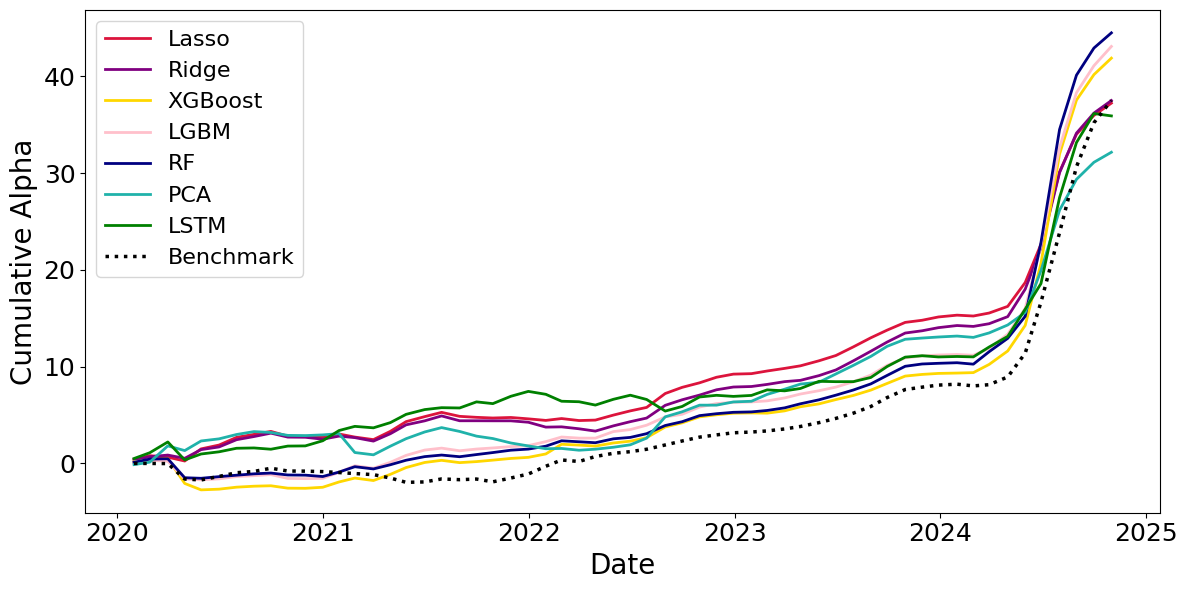

In [226]:
plot_cumulative_alpha(combined_benchmark, 'rolling_alpha_5f') # dashed - market rate; sample XGBoost

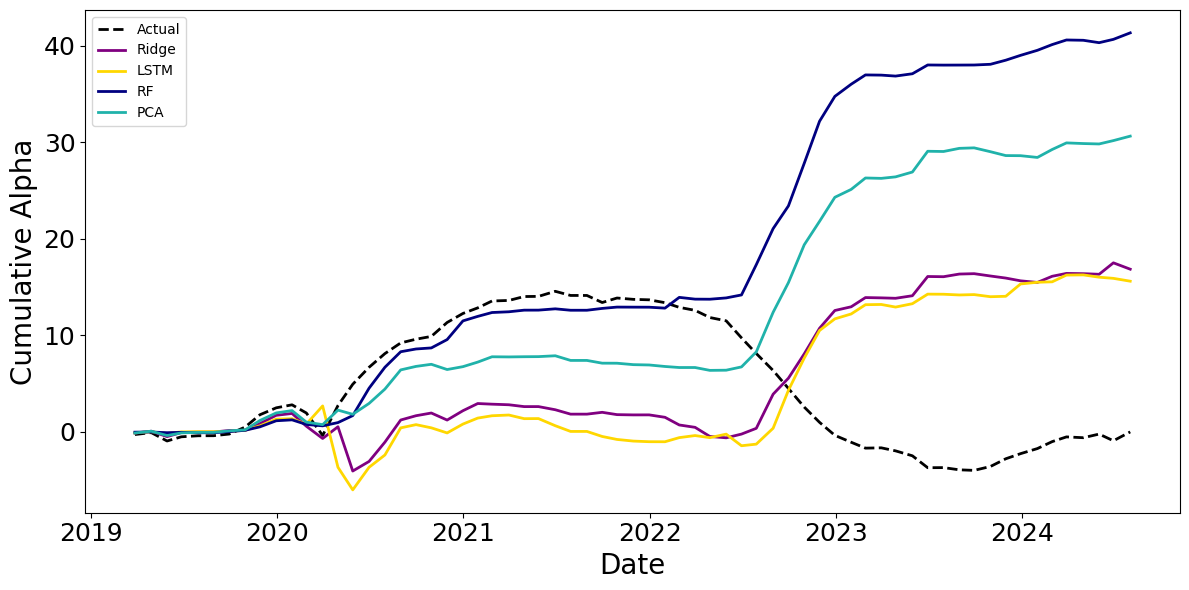

In [173]:
plot_cumulative_alpha(all_results_tech, 'rolling_alpha_5f')

In [15]:
def plot_cumulative_alpha(all_results):
    label_mapping = {'naive': 'Naive', 'linear': 'LR', 'ffnn': 'NN1', 'rf': 'RF', 'rnn': 'RNN'}
    color_list = {'Naive': 'purple', 'LR': 'gold', 'NN1': 'lightseagreen', 'RF': 'navy', 'RNN': 'crimson'}
    factor_list = {'rolling_alpha_3f': '3-Factor', 'rolling_alpha_4f': '4-Factor', 'rolling_alpha_5f': '5-Factor'}
    keys = list(all_results.keys())

    fig, axes = plt.subplots(1, 4, figsize=(24, 6), gridspec_kw={'width_ratios': [1, 1, 1, 0.1]})
    legend_handles = {}

    for i, alpha in enumerate(keys):
        axis = axes[i]
        df = all_results[alpha].copy()

        df.index = pd.to_datetime(df.index)
        df = df.sort_index()
        df = df.groupby(df.index).mean()   # take mean for duplicated dates
        model_cols = [col for col in df.columns if col != alpha]

        df['cumulative_rolling_alpha'] = df[alpha].cumsum()
        for col in model_cols:
            if col != alpha:
                df[f'cumulative_{col}'] = df[col].cumsum()

        axis.plot(
            df.index, df['cumulative_rolling_alpha'], label='Actual', color='black', linestyle='--', linewidth=2
        )
        legend_handles['Actual'] = axis.lines[-1]

        # Plot cumulative alpha for each model
        for col in df.columns:
            if col.startswith('cumulative_') and col != 'cumulative_rolling_alpha':
                model_name = col.replace('cumulative_', '').replace('_3f', '').replace('_4f', '').replace('_5f', '')
                label = label_mapping.get(model_name, model_name)
                color = color_list.get(label, 'black')
                axis.plot(
                    df.index, df[col],
                    label=label, color=color, linewidth=2
                )
                if label not in legend_handles:
                    legend_handles[label] = axis.lines[-1]

        # Formatting the plot
        axis.set_xlabel('Date')
        axis.set_ylabel('Cumulative Alpha')
        axis.set_title(f'Cumulative Alpha Over Time ({factor_list[alpha]})')
        axis.grid(False)
        axis.legend().set_visible(False)

    # Create legend on the right
    axes[3].axis('off')  # Remove axes
    axes[3].legend(
        legend_handles.values(), legend_handles.keys(),
        title='Models', loc='center', fontsize=14, title_fontsize=16
    )

    # Show plot
    plt.tight_layout()
    plt.show()


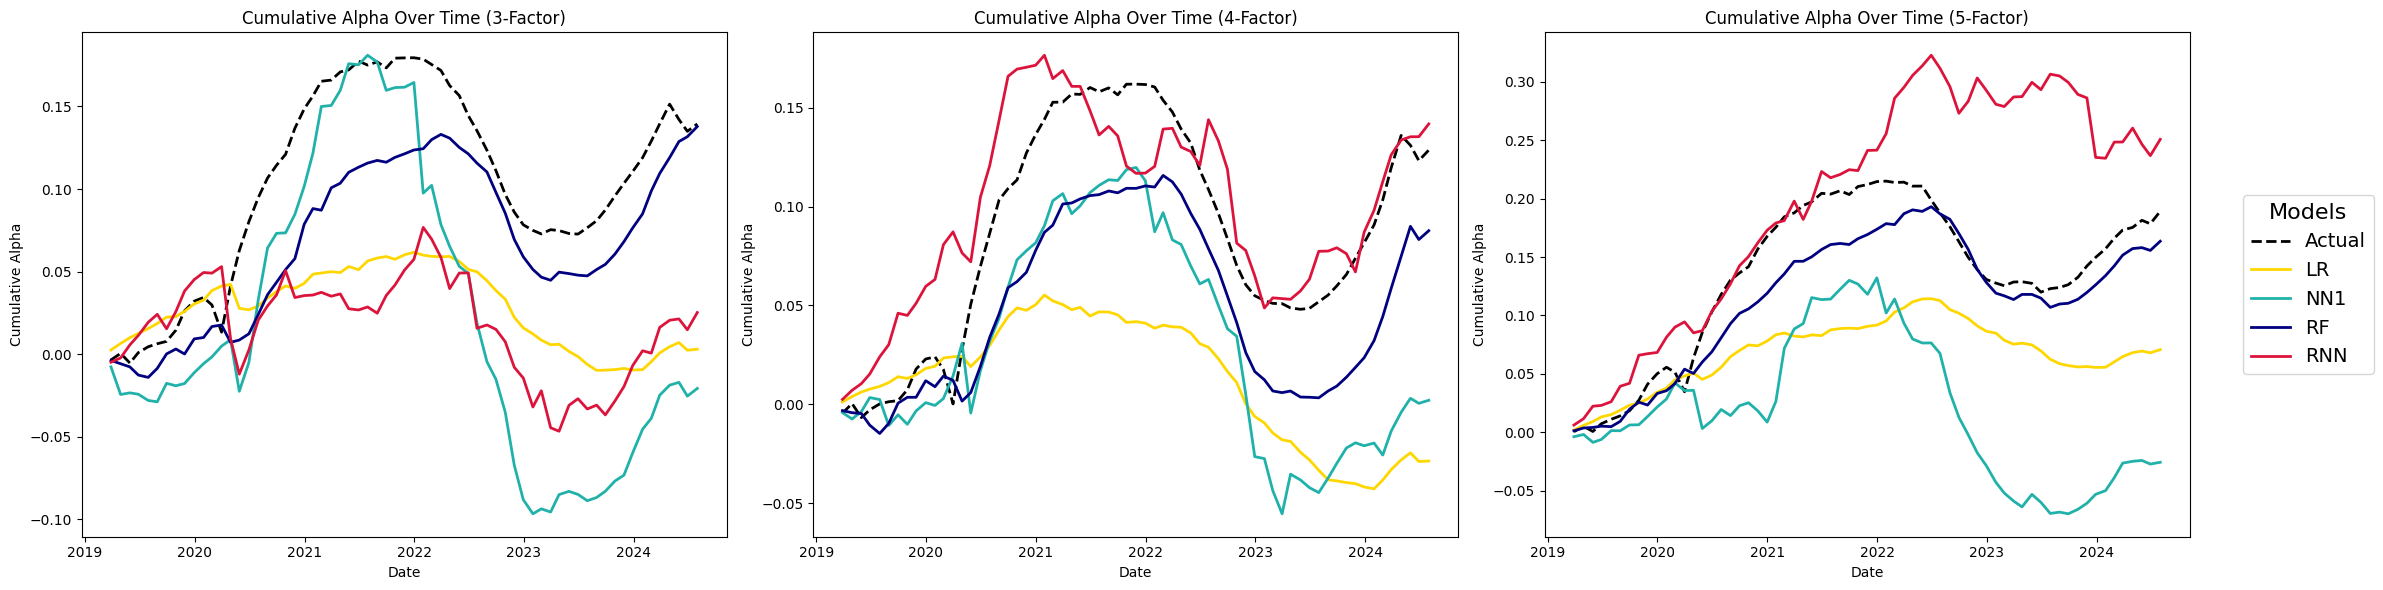

In [16]:
plot_cumulative_alpha(all_results)

Plot 4: Action-Based Cumulative Alpha Over Time

In [ ]:
def plot_action_based_cumulative_alpha(all_results):
    label_mapping = {'naive': 'Naive', 'linear': 'LR', 'ffnn': 'NN1', 'rf': 'RF', 'rnn': 'RNN'}
    color_list = {'Naive': 'purple', 'LR': 'gold', 'NN1': 'lightseagreen', 'RF': 'navy', 'RNN': 'crimson'}
    factor_list = {'rolling_alpha_3f': '3-Factor', 'rolling_alpha_4f': '4-Factor', 'rolling_alpha_5f': '5-Factor'}
    keys = list(all_results.keys())

    fig, axes = plt.subplots(1, 4, figsize=(24, 6), gridspec_kw={'width_ratios': [1, 1, 1, 0.1]}, sharey=True)
    legend_handles = {}

    for i, alpha in enumerate(keys):
        axis = axes[i]
        df = all_results[alpha].copy()

        df.index = pd.to_datetime(df.index)
        df = df.sort_index()
        df = df.groupby(df.index).mean()   # take mean for duplicated dates
        model_cols = [col for col in df.columns if col != alpha]

        df[alpha] = (df[alpha] - df[alpha].mean()) / df[alpha].std()

        # Cumulative actual alpha
        df['cumulative_action_based_alpha'] = df[alpha].cumsum()

        # Compute cumulative action-based alpha
        for col in model_cols:
            df[col] = (df[col] - df[col].mean()) / df[col].std()
            df[f'cumulative_action_based_{col}'] = (df[col] * df[alpha]).cumsum()

        axis.plot(
            df.index, df['cumulative_action_based_alpha'], 
            label='Actual', color='black', linestyle='--', linewidth=2
        )

        legend_handles['Actual'] = axis.lines[-1]

        # Plot cumulative action-based alpha
        for col in model_cols:
            cumulative_col = f'cumulative_action_based_{col}'
            model_name = col.replace('_3f', '').replace('_4f', '').replace('_5f', '')
            label = label_mapping.get(model_name, model_name)
            color = color_list.get(label, 'black')
            axis.plot(
                df.index, df[cumulative_col],
                label=label, color=color, linewidth=2
            )
            if label not in legend_handles:
                legend_handles[label] = axis.lines[-1]

        # Formatting the plot
        axis.set_xlabel('Date', fontsize=20)
        axis.set_ylabel('Cumulative Alpha', fontsize=20)
        axis.set_title(f'Cumulative Alpha Over Time ({factor_list[alpha]})', fontsize=22)
        axis.grid(False)
        axis.legend().set_visible(False)
        axis.tick_params(axis='both', labelsize=18)
        axis.set_ylim((-20, 40))

    # Create legend on the right
    axes[3].axis('off')  # Remove axes
    axes[3].legend(
        legend_handles.values(), legend_handles.keys(),
        title='Models', loc='center', fontsize=18, title_fontsize=22
    )

    # Show plot
    plt.tight_layout()
    plt.show()


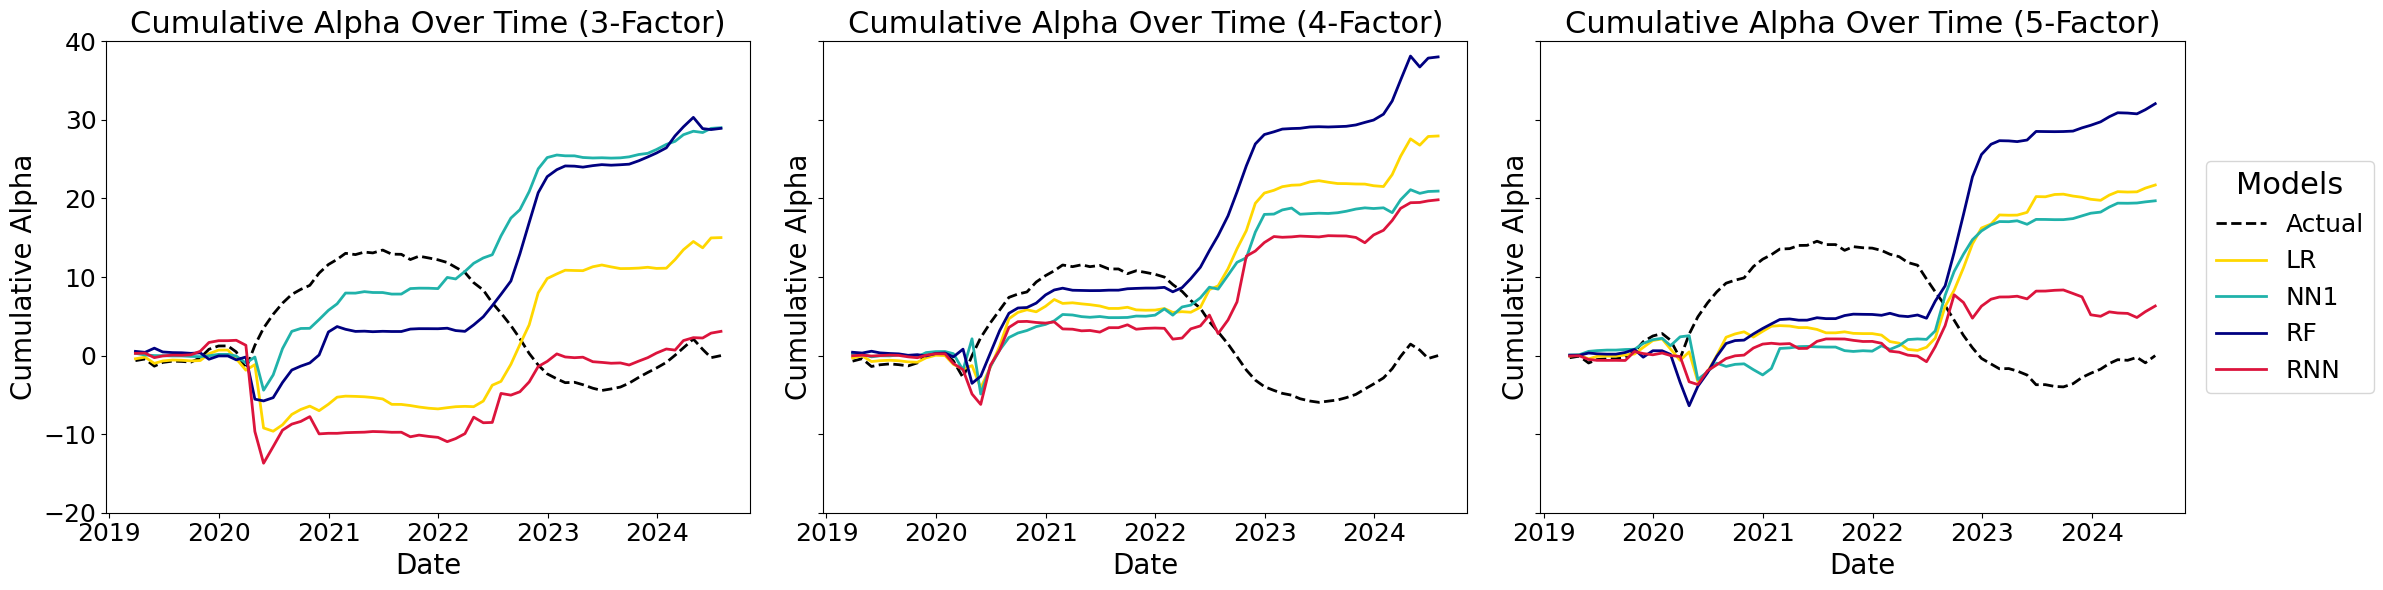

In [22]:
plot_action_based_cumulative_alpha(all_results)

In [28]:
##### Plot 3-, 4-, 5-factor models INDIVIDUALLY for SLIDES #####

def plot_action_based_cumulative_alpha(all_results):
    label_mapping = {'naive': 'Naive', 'linear': 'LR', 'ffnn': 'NN1', 'rf': 'RF', 'rnn': 'RNN'}
    color_list = {'Naive': 'purple', 'LR': 'gold', 'NN1': 'lightseagreen', 'RF': 'navy', 'RNN': 'crimson'}
    factor_list = {'rolling_alpha_3f': '3-Factor', 'rolling_alpha_4f': '4-Factor', 'rolling_alpha_5f': '5-Factor'}
    keys = list(all_results.keys())

    # fig, axes = plt.subplots(1, 4, figsize=(24, 6), gridspec_kw={'width_ratios': [1, 1, 1, 0.1]})
    legend_handles = {}

    for i, alpha in enumerate(keys):
        fig, axis = plt.subplots(figsize=(8, 5))
        df = all_results[alpha].copy()

        df.index = pd.to_datetime(df.index)
        df = df.sort_index()
        df = df.groupby(df.index).mean()   # take mean for duplicated dates
        model_cols = [col for col in df.columns if col != alpha]

        df[alpha] = (df[alpha] - df[alpha].mean()) / df[alpha].std()

        # Cumulative actual alpha
        df['cumulative_action_based_alpha'] = df[alpha].cumsum()

        # Compute cumulative action-based alpha
        for col in model_cols:
            df[col] = (df[col] - df[col].mean()) / df[col].std()
            df[f'cumulative_action_based_{col}'] = (df[col] * df[alpha]).cumsum()

        axis.plot(
            df.index, df['cumulative_action_based_alpha'], 
            label='Actual', color='black', linestyle='--', linewidth=2
        )

        legend_handles['Actual'] = axis.lines[-1]

        # Plot cumulative action-based alpha
        for col in model_cols:
            cumulative_col = f'cumulative_action_based_{col}'
            model_name = col.replace('_3f', '').replace('_4f', '').replace('_5f', '')
            label = label_mapping.get(model_name, model_name)
            color = color_list.get(label, 'black')
            axis.plot(
                df.index, df[cumulative_col],
                label=label, color=color, linewidth=2
            )
            if label not in legend_handles:
                legend_handles[label] = axis.lines[-1]

        # Formatting the plot
        axis.set_xlabel('Date', fontsize=18)
        axis.set_ylabel('Cumulative Alpha', fontsize=18)
        axis.set_title(f'Action-Based Cumulative Alpha Over Time ({factor_list[alpha]})', fontsize=18)
        axis.grid(False)
        axis.legend().set_visible(True)
        axis.legend(fontsize=12)
        axis.tick_params(axis='both', labelsize=16)
        axis.set_ylim((-20, 40))

        plt.tight_layout()

    # # Create legend on the right
    # axes[3].axis('off')  # Remove axes
    # axes[3].legend(
    #     legend_handles.values(), legend_handles.keys(),
    #     title='Models', loc='center', fontsize=14, title_fontsize=16
    # )

    # # Show plot
    # plt.tight_layout()
    # plt.show()

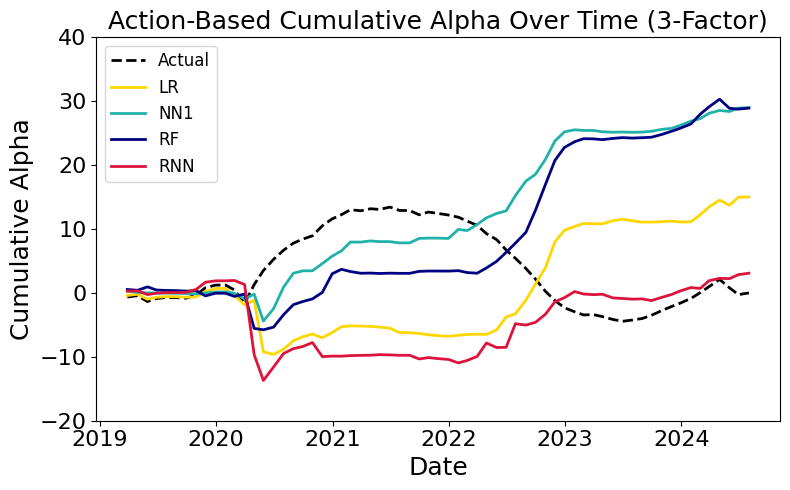

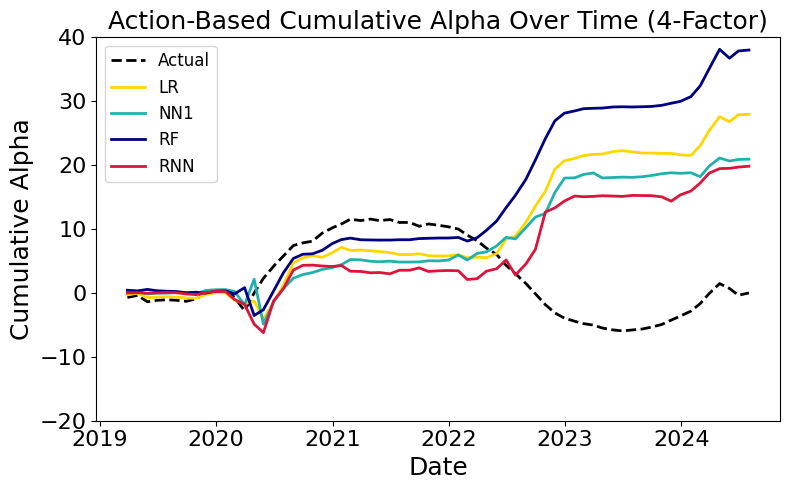

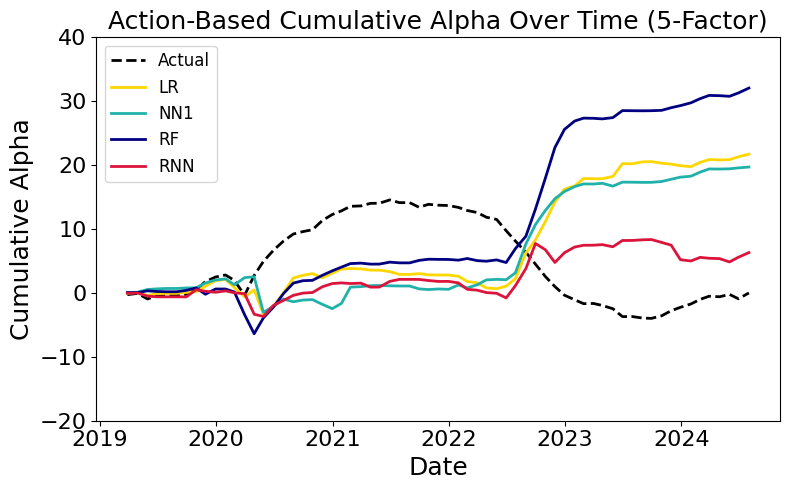

In [ ]:
plot_action_based_cumulative_alpha(all_results)

Plot 5: Cumulative Alpha for Top Decile Funds

In [25]:
# Loading in df
df = pd.read_csv("df_ff_factors_010225.csv")
df = df.drop(columns=["Unnamed: 0","crsp_portno"])
df = df.sort_values(by='date')
df['date'] = pd.to_datetime(df['date']) 

# Alpha model training results (all models)
y_3f = pd.read_csv("results_alpha/all_3f_alpha.csv")
y_4f = pd.read_csv("results_alpha/all_4f_alpha.csv")
y_5f = pd.read_csv("results_alpha/all_5f_alpha.csv")

In [ ]:
# Combining results df with fundno and dates
rolling_alphas = ["rolling_alpha_3f", "rolling_alpha_4f", "rolling_alpha_5f"]
results = [y_3f, y_4f, y_5f]
df_with_id = {}

for i in range(0, len(rolling_alphas)):
    factor = rolling_alphas[i][-2:]

    dataset = df[["crsp_fundno", "date", rolling_alphas[i]]]
    merged_df = pd.merge(results[i], dataset, how="left", on=rolling_alphas[i])
    merged_df = merged_df.rename(columns={'naive': f'naive_{factor}'})
    
    merged_df = merged_df.set_index('date')
    feature_cols = [col for col in merged_df_no_id.columns if col not in [rolling_alphas[i]]]

    # Using a dictionary to store the df for different factor models
    df_with_id[rolling_alphas[i]] = merged_df


In [27]:
def top_decile_funds(results, alpha, top_n=10):
    fund_perf = results.groupby('crsp_fundno')[alpha].mean()
    top_funds = fund_perf.sort_values(ascending=False).head(top_n).index
    filtered = results[results['crsp_fundno'].isin(top_funds)]
    return filtered

def top_funds_cumulative(results, rolling_alphas):
    cumulative_results = {}

    for alpha in rolling_alphas:
        df = results[alpha]
        filtered = top_decile_funds(df, alpha, top_n=10)

        cumul_model_results = {}
        model_cols = [col for col in filtered.columns if col not in ['crsp_fundno', alpha, 'date']]
        for model in model_cols:
            model_grouped = filtered.groupby('date')[model].sum()
            cumul_model_results[model] = model_grouped.cumsum()

        cumulative_results[alpha] = cumul_model_results

    return cumulative_results

In [28]:
def plot_top_funds(cumulative_results):
    label_mapping = {'naive': 'Naive', 'linear': 'LR', 'ffnn': 'NN1', 'rf': 'RF', 'rnn': 'RNN'}
    color_list = {'Naive': 'crimson', 'LR': 'gold', 'NN1': 'lightseagreen', 'RF': 'navy', 'RNN': 'purple'}
    factor_list = {'rolling_alpha_3f': '3-Factor', 'rolling_alpha_4f': '4-Factor', 'rolling_alpha_5f': '5-Factor'}
    keys = list(cumulative_results.keys())

    fig, axes = plt.subplots(1, 4, figsize=(24, 6), gridspec_kw={'width_ratios': [1, 1, 1, 0.1]})
    legend_handles = {}

    for i, factor in enumerate(keys):
        axis = axes[i]
        model_results = cumulative_results[factor]  # Get cumulative alpha per model

        # Plot cumulative alpha for each model
        for model, cumulative_alpha in model_results.items():
            model_name = model.replace('_3f', '').replace('_4f', '').replace('_5f', '')
            label = label_mapping.get(model_name, model_name)
            color = color_list.get(label, 'black')
            axis.plot(
                cumulative_alpha.index, cumulative_alpha,
                label=label, color=color, linewidth=2
            )
            if label not in legend_handles:  # Store for legend
                legend_handles[label] = axis.lines[-1]

        # Formatting
        axis.set_xlabel('Date', fontsize=14)
        axis.set_ylabel('Cumulative Alpha', fontsize=14)
        axis.set_title(f'Cumulative Alpha of Top Decile Funds Over Time ({factor_list.get(factor, factor)})')
        axis.grid(False)
        axis.legend().set_visible(False)

    # Create a shared legend in the fourth subplot
    axes[3].axis('off')  # Remove axes
    axes[3].legend(
        legend_handles.values(), legend_handles.keys(),
        title='Models', loc='center', fontsize=14, title_fontsize=16
    )

    # Show the plot
    plt.tight_layout()
    plt.show()
    

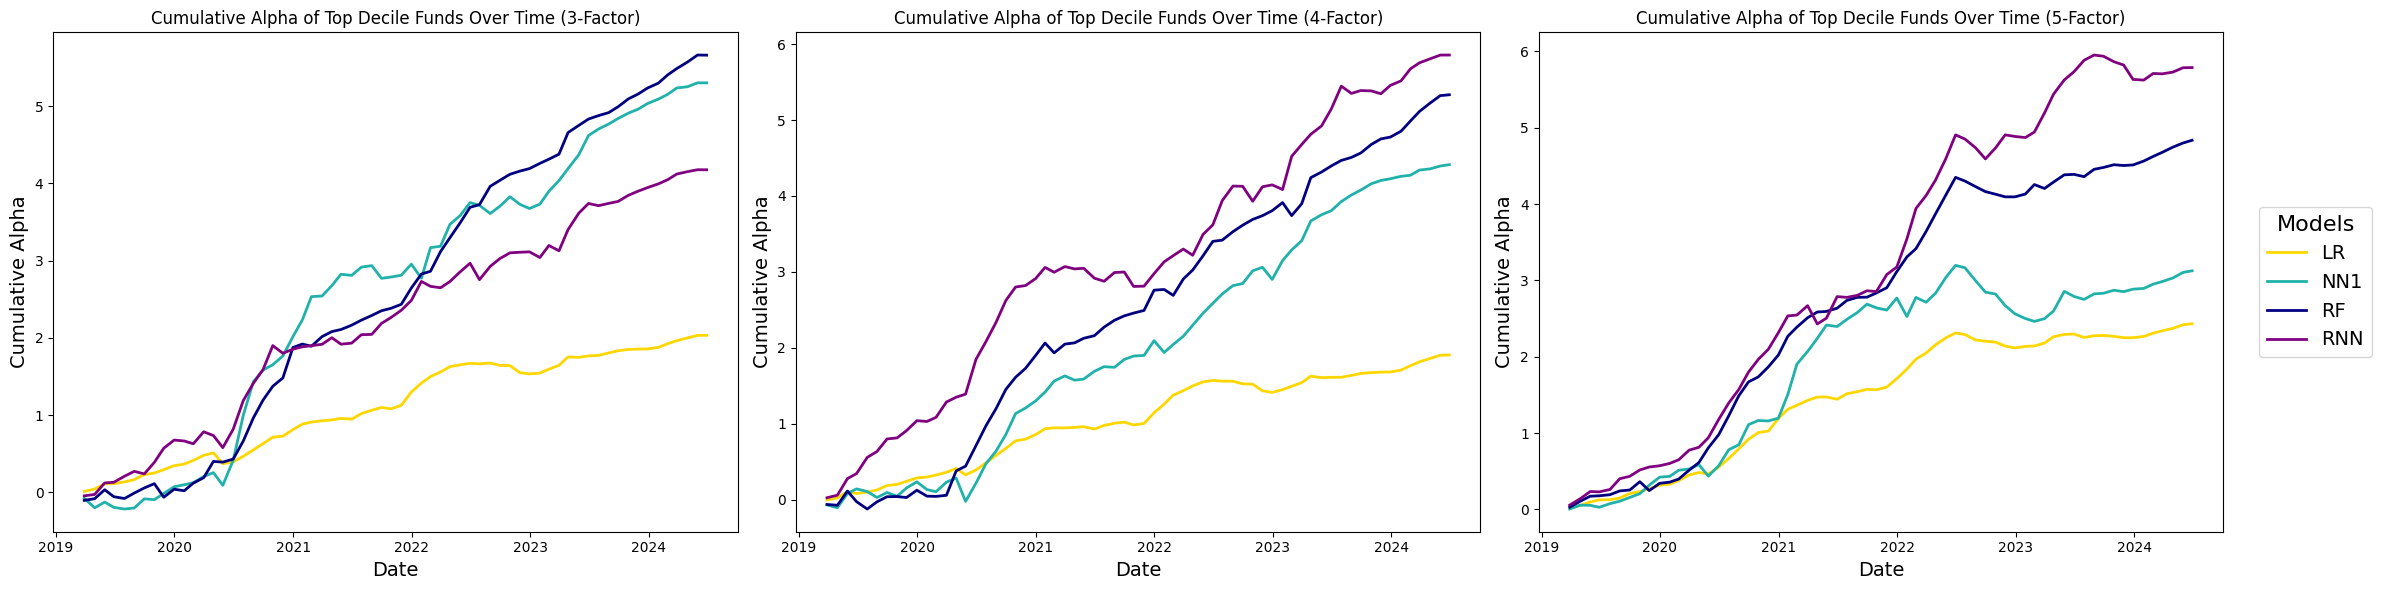

In [30]:
cumulative_results = top_funds_cumulative(df_with_id, rolling_alphas)
plot_top_funds(cumulative_results)